170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 25s 0us/step
Training set shape: (50000, 32, 32, 3)
Test set shape: (10000, 32, 32, 3)
y_train shape: (50000, 1)
y_train (first 5): [6 9 9 4 1]


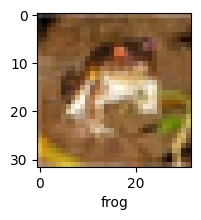

Sample normalized pixel data:
 [[0.23137255 0.24313725 0.24705882]
 [0.16862745 0.18039216 0.17647059]
 [0.19607843 0.18823529 0.16862745]
 [0.26666667 0.21176471 0.16470588]
 [0.38431373 0.28627451 0.20392157]]

Training ANN model...
Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.2975 - loss: 1.9521 - val_accuracy: 0.3985 - val_loss: 1.6961
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 27ms/step - accuracy: 0.4075 - loss: 1.6772 - val_accuracy: 0.4342 - val_loss: 1.6052
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 27ms/step - accuracy: 0.4406 - loss: 1.5795 - val_accuracy: 0.4219 - val_loss: 1.6142
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 27ms/step - accuracy: 0.4659 - loss: 1.5191 - val_accuracy: 0.4165 - val_loss: 1.6264
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 27ms/step - accuracy: 0.4825 - loss: 1.4679 - val_accuracy: 0.4520 - val_loss: 1.5482
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.4611 - loss: 1.5434

ANN Test Loss: 1.5482 | ANN Test 

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 66s 41ms/step - accuracy: 0.3419 - loss: 1.7756 - val_accuracy: 0.5391 - val_loss: 1.2801
Epoch 2/10
 135/1563 ━━━━━━━━━━━━━━━━━━━━ 1:00 42ms/step - accuracy: 0.5420 - loss: 1.3028

In [ ]:
# ============================================
# Practical 3: Build Image Classification Model using CNN
# ============================================


import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np


(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

print("Training set shape:", x_train.shape)
print("Test set shape:", x_test.shape)
print("y_train shape:", y_train.shape)

y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)
print("y_train (first 5):", y_train[:5])


classes = ["airplane","automobile","bird","cat","deer",
           "dog","frog","horse","ship","truck"]


def plot_sample(x, y, index):
    plt.figure(figsize=(4,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])
    plt.show()


plot_sample(x_train, y_train, 0)


x_train = x_train / 255.0
x_test = x_test / 255.0

print("Sample normalized pixel data:\n", x_train[0][0][0:5])


annmodel = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(1000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')
])


annmodel.compile(optimizer='SGD',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])

print("\nTraining ANN model...")
history_ann = annmodel.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))


ann_loss, ann_acc = annmodel.evaluate(x_test, y_test)
print(f"\nANN Test Loss: {ann_loss:.4f} | ANN Test Accuracy: {ann_acc:.4f}")


cnn = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])


print("\nTraining CNN model...")
history_cnn = cnn.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


cnn_loss, cnn_acc = cnn.evaluate(x_test, y_test)
print(f"\nCNN Test Loss: {cnn_loss:.4f} | CNN Test Accuracy: {cnn_acc:.4f}")


plt.figure(figsize=(8,5))
plt.plot(history_cnn.history['accuracy'], label='Training Accuracy', color='red')
plt.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy', color='green')
plt.title('CNN Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


y_pred = cnn.predict(x_test)
y_classes = [np.argmax(element) for element in y_pred]

print("Predicted classes (first 5):", y_classes[:5])
print("True classes (first 5):", y_test[:5])


index = 3
plot_sample(x_test, y_test, index)
print("Predicted Label:", classes[y_classes[index]])
print("True Label:", classes[y_test[index]])


cnn.save('/content/cnnmodel.h5')
print("Model saved successfully at /content/cnnmodel.h5")
